<a href="https://colab.research.google.com/github/MichaelAndreyeshchev/disease-classification-system/blob/backend/Disease_Classification_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd drive/MyDrive/Disease Datasets

/content/drive/MyDrive/Disease Datasets


## [Brain Tumor Dataset](https://www.kaggle.com/navoneel/brain-mri-images-for-brain-tumor-detection)

In [2]:
import cv2
import imutils
import numpy as np
import shutil
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [3]:
cd brain_tumor_dataset

/content/drive/MyDrive/Disease Datasets/brain_tumor_dataset


#### Lengths "no" and "yes" image folders

In [4]:
print("\"no\" length =", len(os.listdir(os.path.join("", "no"))))
print("\"yes\" length =", len(os.listdir(os.path.join("", "yes"))))

"no" length = 77
"yes" length = 155


No example:
no/3 no.jpg


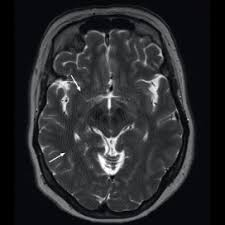


________________________________________

Yes example:
yesY76.jpg


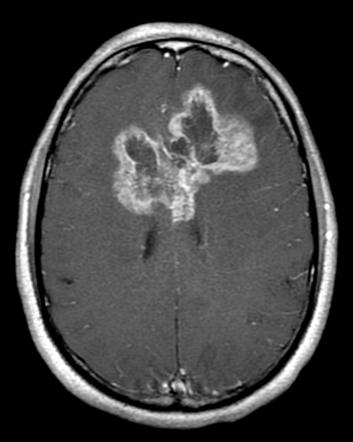

In [5]:
from IPython.display import Image, display

print("No example:")
print("no/" + os.listdir(os.path.join("", "no"))[0])
display(Image(filename=("no/" + os.listdir(os.path.join("", "no"))[0])))
print("\n________________________________________\n")
print("Yes example:")
print("yes" + os.listdir(os.path.join("", "yes"))[0])
display(Image(filename=("yes/" + os.listdir(os.path.join("", "yes"))[0])))

In [ ]:
data = os.listdir(os.path.join("", "yes")) + os.listdir(os.path.join("", "no"))


In [16]:
from sklearn.model_selection import train_test_split
import random

data = os.listdir(os.path.join("", "yes")) + os.listdir(os.path.join("", "no"))
random.shuffle(data)

train = data[:int(len(data)*0.8)]
test = data[int(len(data)*0.8):]

In [17]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model

In [18]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-01-20 02:49:41--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.8.128, 74.125.203.128, 64.233.189.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.8.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  32.3MB/s    in 2.6s    

2022-01-20 02:49:44 (32.3 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [19]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(
    input_shape=(150, 150, 3), include_top=False, weights=None)
pre_trained_model.load_weights(local_weights_file)

In [20]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

last layer output shape: (None, 7, 7, 768)


In [21]:
from tensorflow.keras.optimizers import RMSprop
import keras

model = keras.models.Sequential([
keras.Input(shape=(150, 150, 3)),
layers.Conv2D(32, 3, strides=(1, 1), activation='relu', data_format='channels_last', name='conv0'),
layers.MaxPool2D((2, 2), name='max_pool0'),
layers.BatchNormalization(name='bn0'),
layers.Conv2D(64, 3, strides=(1, 1), activation='relu', data_format='channels_last', name='conv1'),
layers.MaxPool2D((2, 2), name='max_pool1'),
layers.BatchNormalization(name='bn1'),
layers.Conv2D(128, 3, strides=(1, 1), activation='relu', data_format='channels_last', name='conv2'),
layers.MaxPool2D((2, 2), name='max_pool2'),
layers.Flatten(),
layers.Dense(1, activation='sigmoid')                                 
])


In [22]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

# Configure and compile the model
model = Model(pre_trained_model.input, x)
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [25]:
import numpy as np

train = np.array(train)
test = np.array(test)

In [27]:
history = model.fit_generator(
      train,
      steps_per_epoch=100,
      epochs=5,
      validation_data=test,
      validation_steps=50,
      verbose=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


ValueError: ignored